In [1]:
#options(repr.plot.width = 4)
#options(repr.plot.height = 4)
library('ISLR')

# An Introduction to Statistical Learning (Gareth James et al.)
Notes and exercises from working through this resource.

# Chapter 1: Introduction

# Chapter 2: Statistical Learning
## Lab

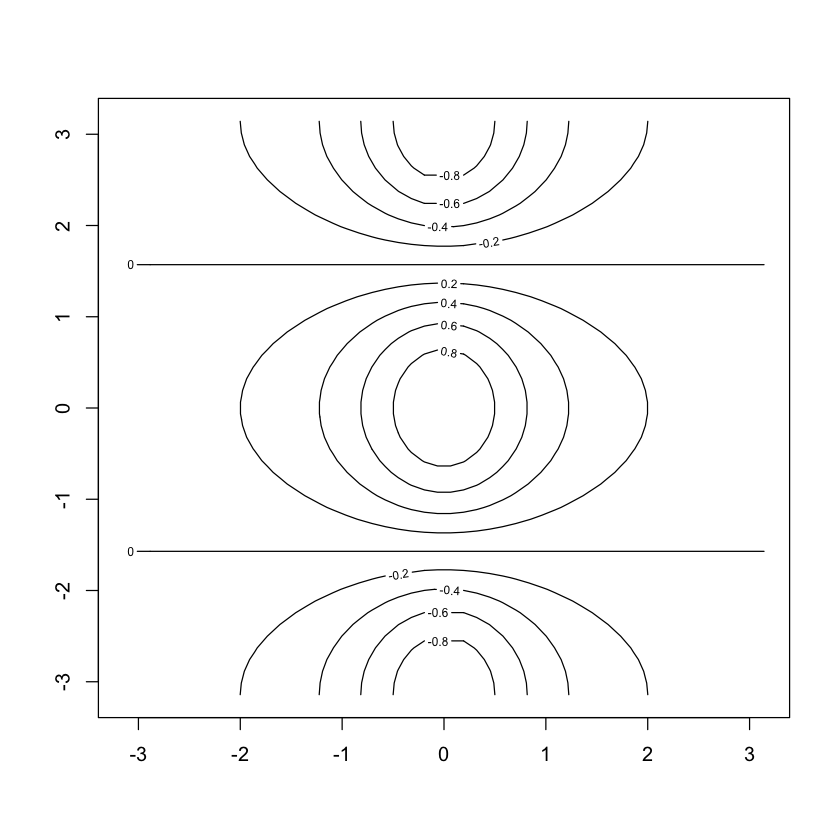

In [2]:
x <- seq(-pi, pi, length=50)
y <- x
f <- outer(x, y, function(x, y) cos(y)/(1+x^2))
contour(x, y, f)

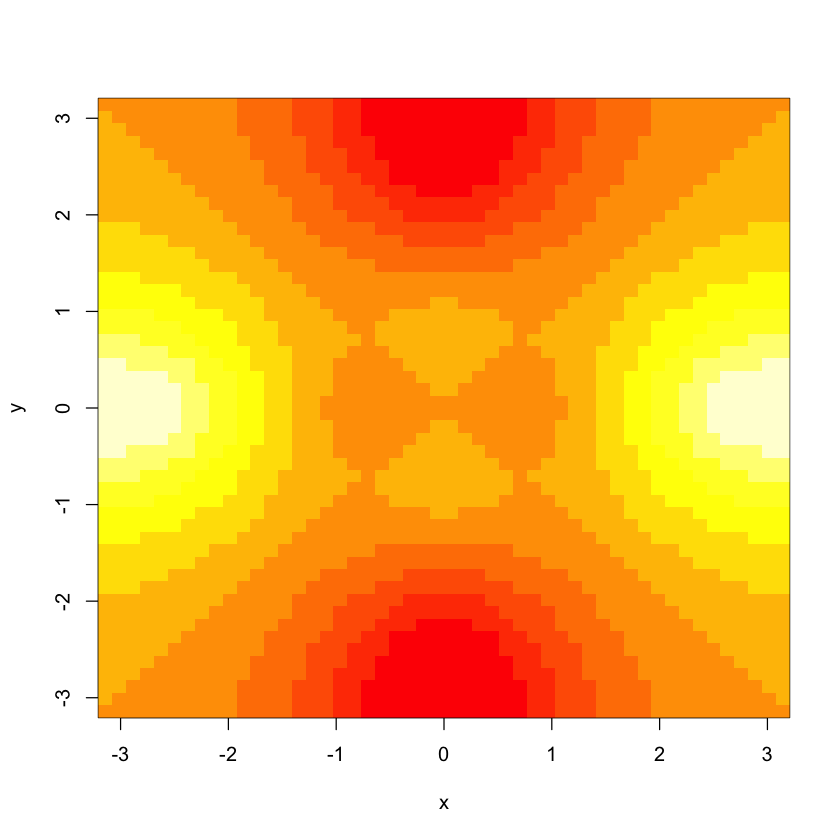

In [3]:
fa <- (f - t(f))/2
image(x, y, fa)

## Exercises
1. 
    1. Large sample size with small number of predictors 
        - Expect a more flexible statistical method to be more accurate as the large data set will keep the bias of the method in check.
    2. Large predictors with small dataset 
        - Expect a less flexible method to perform better as there is a high risk of overfitting here with the small dataset
    3. Highly nonlinear relationship between predictors and response 
        - Expect a more flexible method to perform best as the extra capability in the model is needed to effectively model the nonlinear relationships
    4. High variance of error terms 
        - Expect a less flexible method to perform best as it will be less influenced by the high variance of the data.
2. 
    1. Interested in CEO salary based on company information 
        - Regression, inference
    2. Success or failure of new product based on success/failure metric of other products 
        - Classification, prediction
    3. Percent change in US dollar relative to stock markets 
        - Regression, prediction
3. 
    - Bias reduces with increased flexibility
    - Variance increase with increased flexibility
    - Training error reduces with increased flexibility
    - Test error has a minimum and some level of flexibility
    - Bayes (irreducible) error is constant
4. 
    1.  
        - Email spam classification: Goal is prediction
        - Customer preferences: Goal is inference
        - Credit card fraud detection: Goal is prediction
    2. 
        - House price modelling: Goal is inference so that policy can be based around key predictors
        - Climate change: Goal is inference so that technologies can combat areas of largest effect
        - Stock model price: Goal is prediction
    3. 
        - Customer segmentation
        - Grouping species into larger categories
        - Understanding behaviours patterns
5. Flexible approaches are usefuly when the dataset relative to the number of predictors is large, the behaviour is complex/nonlinear, and prediction is more important then inference.
6. Parametric approaches involve fitting parameters of a fixed model to a dataset while a nonparametric model makes no assumption about the form of the model. Nonparametric approaches require relatively larger amounts of data and loss intrepretability.
7. 
    2. With K = 1 the prediction is Green
    3. With K = 3 the prediction is Red (2 Red, 1 Green)
    4. If Bayes decision boundary is highly nonlinear we expect a lower value of K to perform better as the increased capability of the model will be able to model the nonlinearities better.

## Work on College dataset questions:

In [4]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

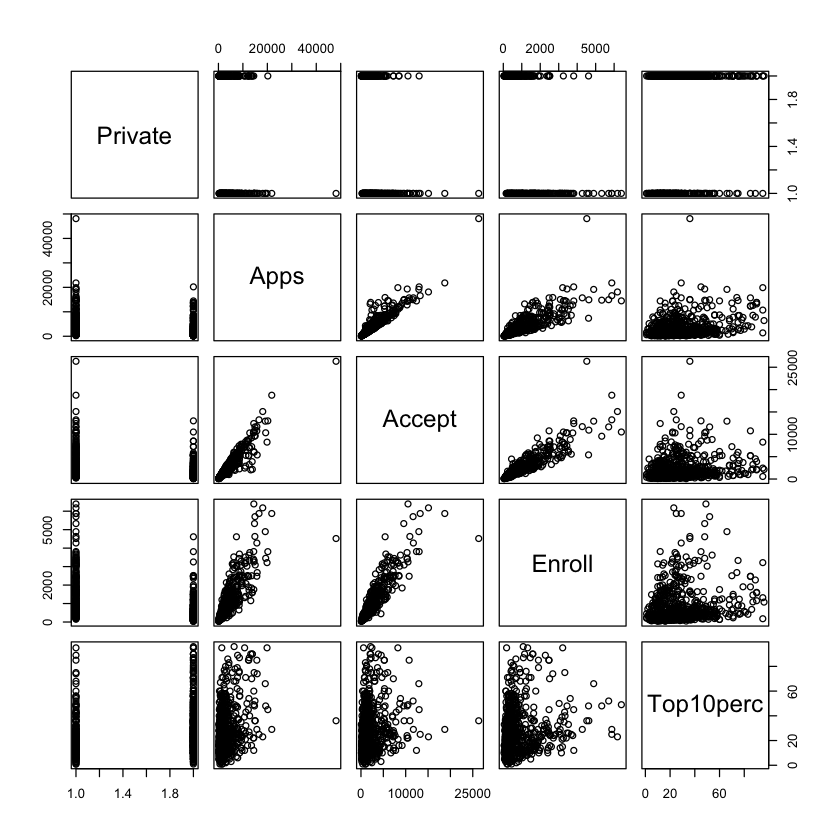

In [6]:
pairs(College[,1:5])

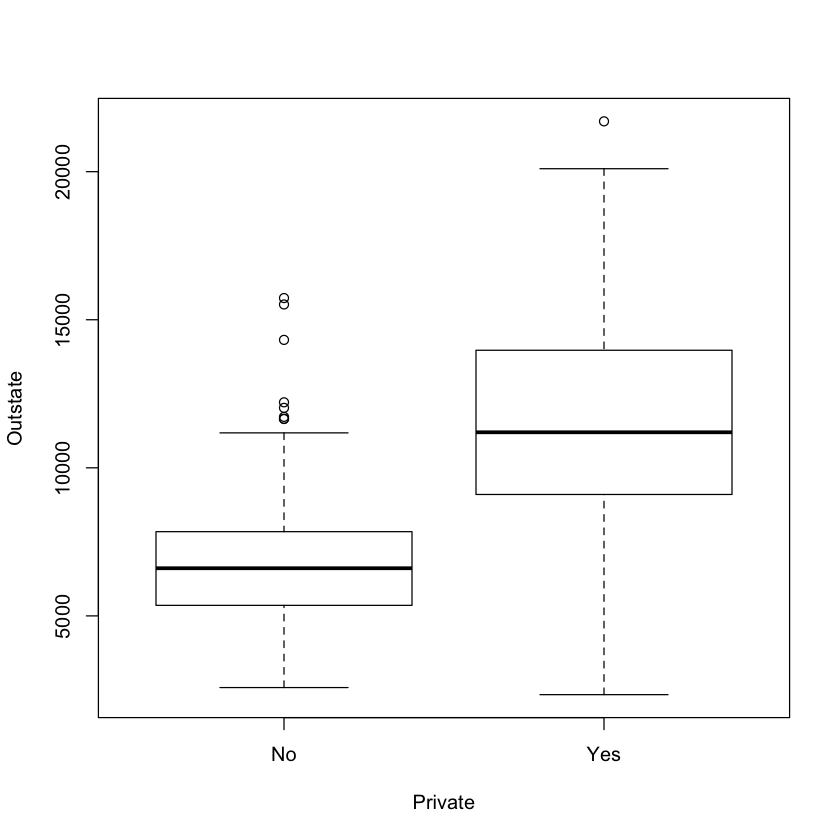

In [7]:
plot(Outstate~Private, data=College)

In [8]:
Elite <- rep('No', nrow(College))
Elite[College$Top10perc > 50] <- 'Yes'
Elite <- as.factor(Elite)
College <- data.frame(College, Elite)

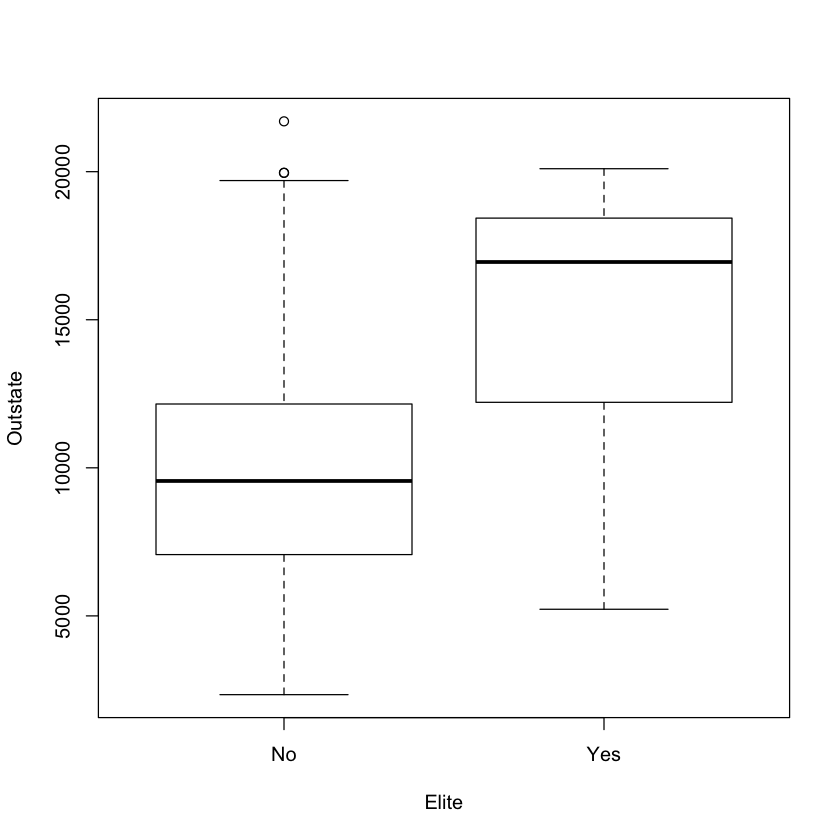

In [9]:
plot(Outstate~Elite, data=College)

In [10]:
summary(College)

 Private        Apps           Accept          Enroll       Top10perc    
 No :212   Min.   :   81   Min.   :   72   Min.   :  35   Min.   : 1.00  
 Yes:565   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242   1st Qu.:15.00  
           Median : 1558   Median : 1110   Median : 434   Median :23.00  
           Mean   : 3002   Mean   : 2019   Mean   : 780   Mean   :27.56  
           3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902   3rd Qu.:35.00  
           Max.   :48094   Max.   :26330   Max.   :6392   Max.   :96.00  
   Top25perc      F.Undergrad     P.Undergrad         Outstate    
 Min.   :  9.0   Min.   :  139   Min.   :    1.0   Min.   : 2340  
 1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0   1st Qu.: 7320  
 Median : 54.0   Median : 1707   Median :  353.0   Median : 9990  
 Mean   : 55.8   Mean   : 3700   Mean   :  855.3   Mean   :10441  
 3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0   3rd Qu.:12925  
 Max.   :100.0   Max.   :31643   Max.   :21836.0   Max.   :21700  
   Room.Board

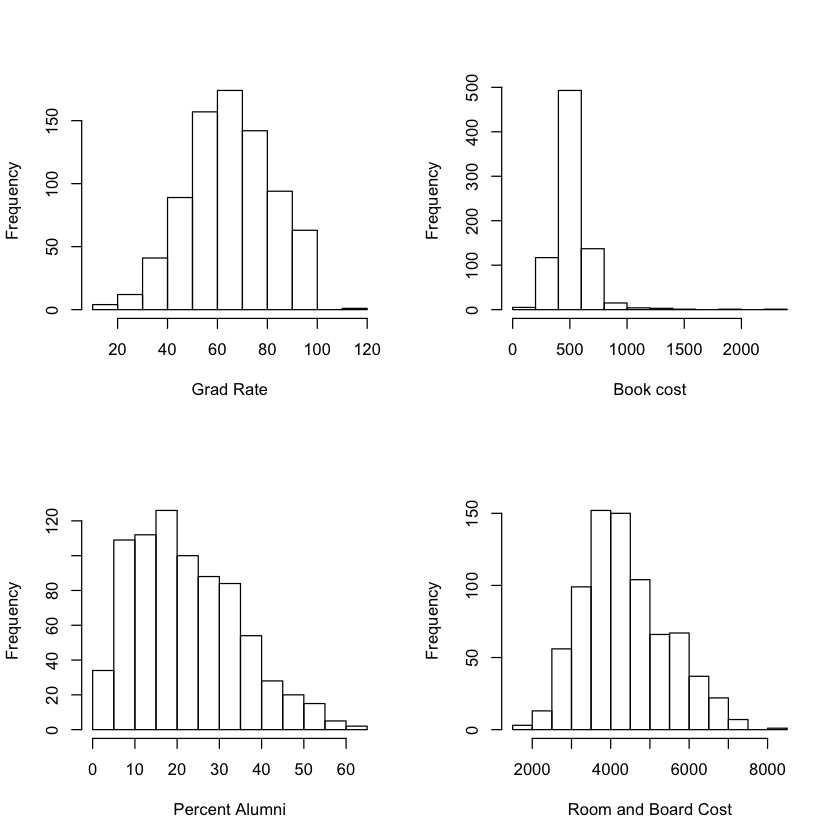

In [11]:
par(mfrow=c(2,2))
hist(College$Grad.Rate, xlab='Grad Rate', main='')
hist(College$Books, xlab='Book cost', main='')
hist(College$perc.alumni, xlab='Percent Alumni', main='')
hist(College$Room.Board, xlab='Room and Board Cost', main='')

## Work on Boston dataset questions:

In [12]:
library('MASS')

In [13]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [14]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


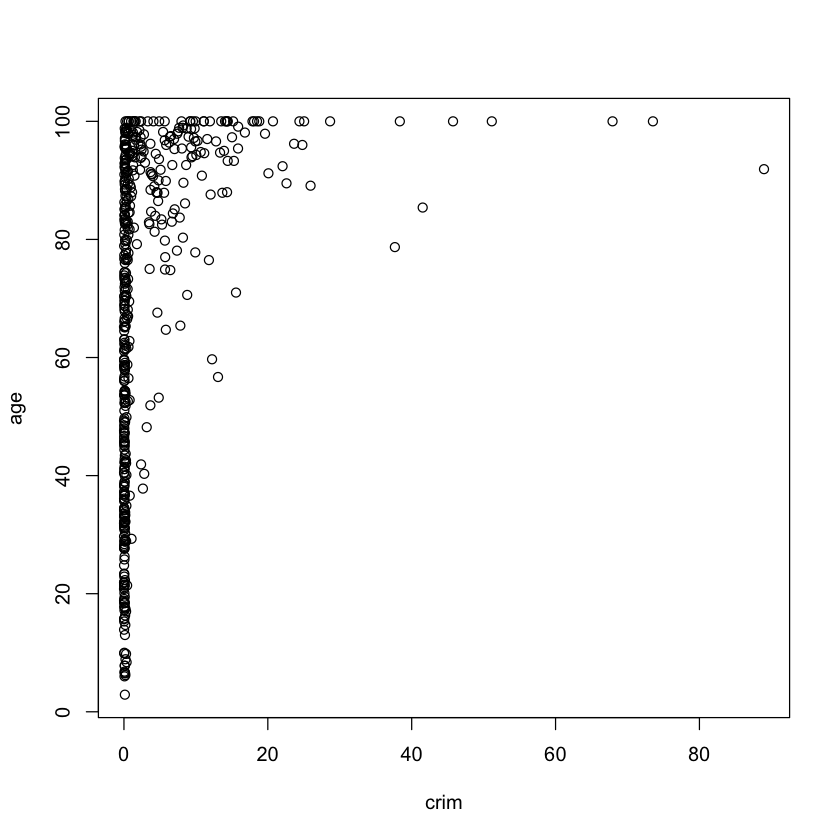

In [15]:
plot(age~crim, data=Boston)

# Chapter 3: Linear Regression
## Lab

In [16]:
attach(Boston)
lm.fit <- lm(medv~lstat)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


In [17]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


In [18]:
predict(lm.fit, data.frame(lstat=c(5,10,15)), interval='prediction')

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


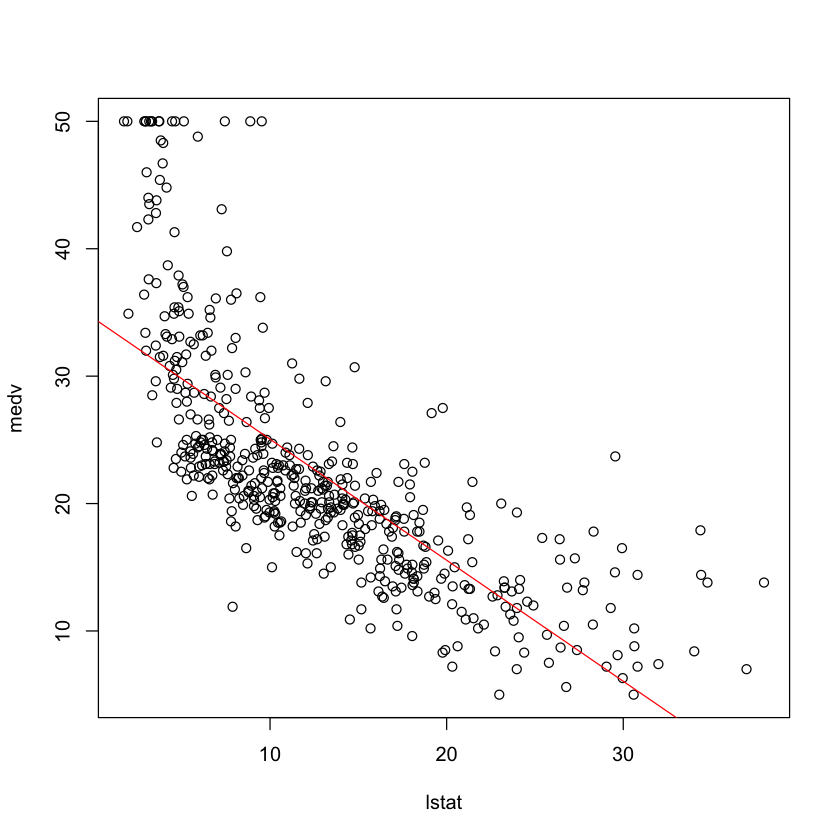

In [19]:
plot(lstat, medv)
abline(lm.fit, col='red')

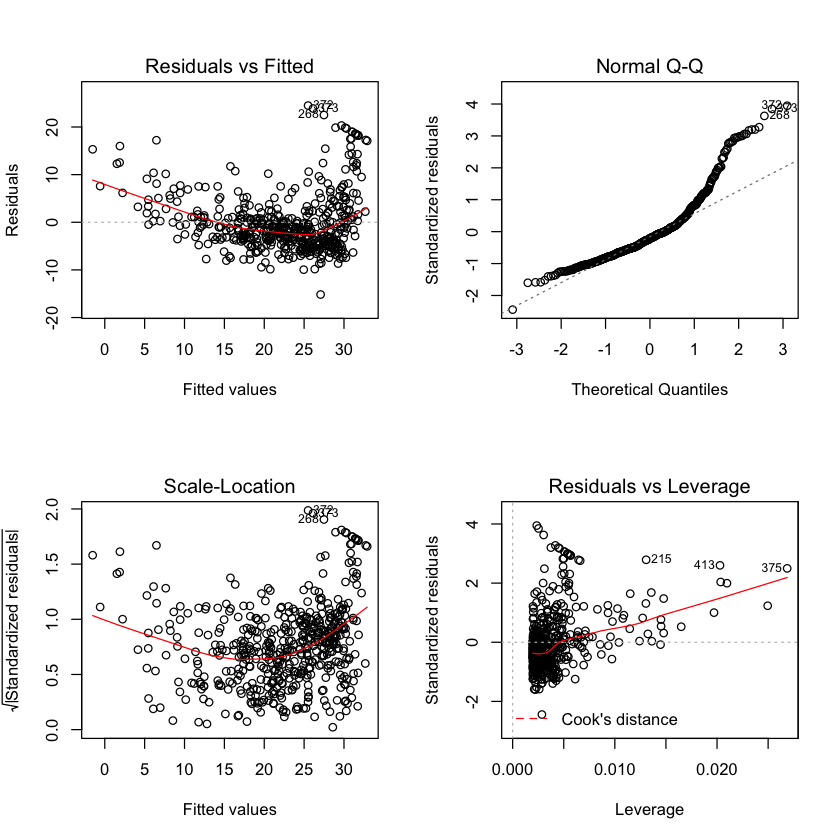

In [20]:
par(mfrow=c(2,2))
plot(lm.fit)

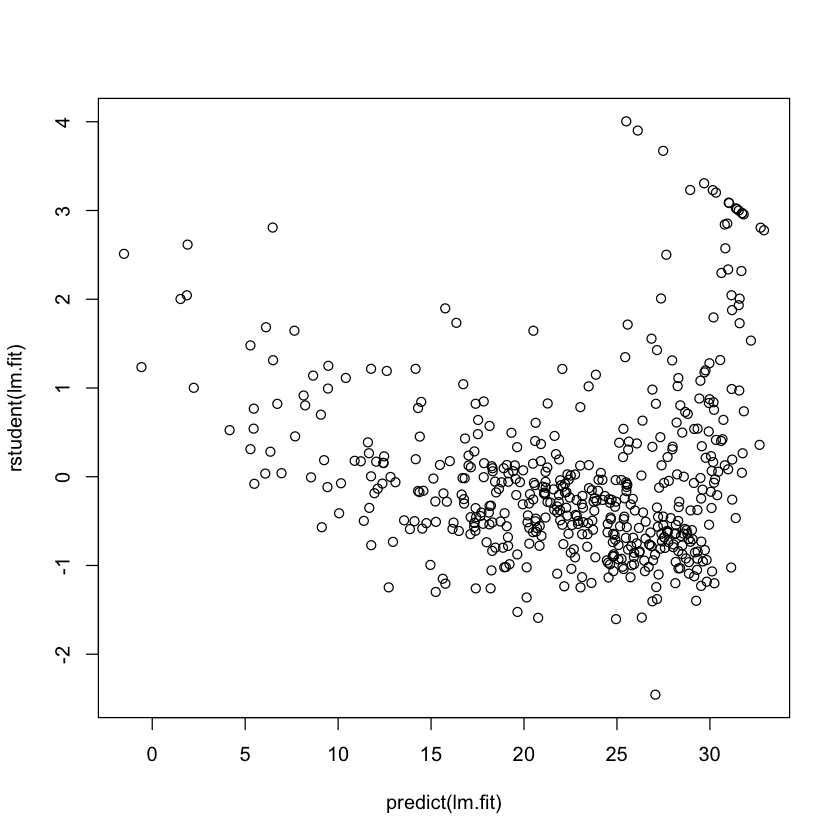

In [21]:
plot(predict(lm.fit), rstudent(lm.fit))

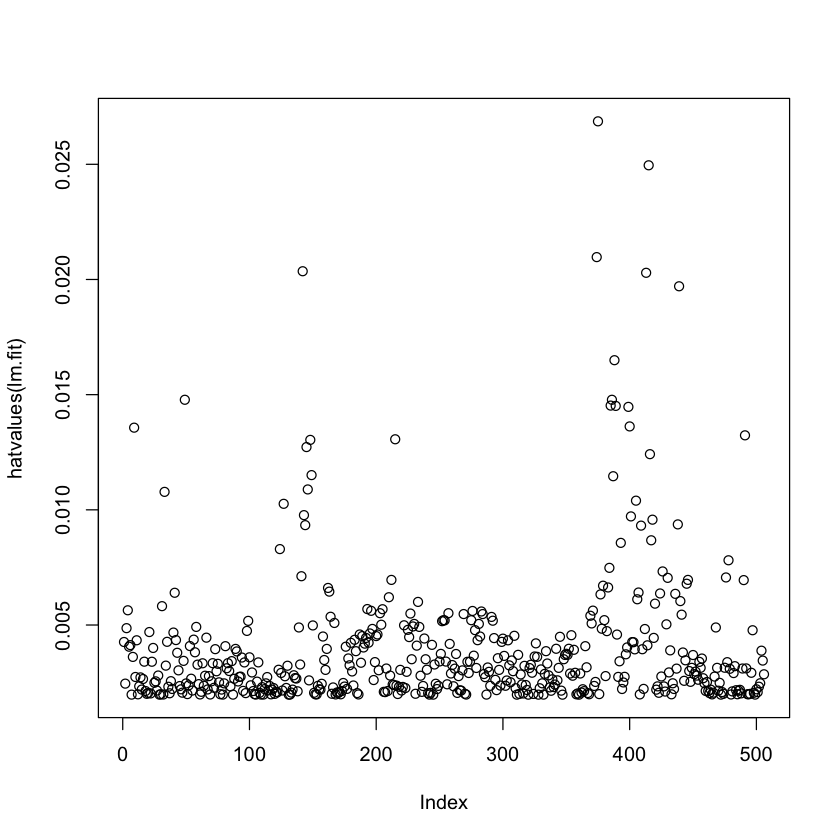

In [22]:
plot(hatvalues(lm.fit))

In [23]:
lm.fit <- lm(medv~lstat+age)
summary(lm.fit)


Call:
lm(formula = medv ~ lstat + age)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.981  -3.978  -1.283   1.968  23.158 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 33.22276    0.73085  45.458  < 2e-16 ***
lstat       -1.03207    0.04819 -21.416  < 2e-16 ***
age          0.03454    0.01223   2.826  0.00491 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.173 on 503 degrees of freedom
Multiple R-squared:  0.5513,	Adjusted R-squared:  0.5495 
F-statistic:   309 on 2 and 503 DF,  p-value: < 2.2e-16


In [24]:
lm.fit <- lm(medv~., data=Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.595  -2.730  -0.518   1.777  26.199 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.646e+01  5.103e+00   7.144 3.28e-12 ***
crim        -1.080e-01  3.286e-02  -3.287 0.001087 ** 
zn           4.642e-02  1.373e-02   3.382 0.000778 ***
indus        2.056e-02  6.150e-02   0.334 0.738288    
chas         2.687e+00  8.616e-01   3.118 0.001925 ** 
nox         -1.777e+01  3.820e+00  -4.651 4.25e-06 ***
rm           3.810e+00  4.179e-01   9.116  < 2e-16 ***
age          6.922e-04  1.321e-02   0.052 0.958229    
dis         -1.476e+00  1.995e-01  -7.398 6.01e-13 ***
rad          3.060e-01  6.635e-02   4.613 5.07e-06 ***
tax         -1.233e-02  3.760e-03  -3.280 0.001112 ** 
ptratio     -9.527e-01  1.308e-01  -7.283 1.31e-12 ***
black        9.312e-03  2.686e-03   3.467 0.000573 ***
lstat       -5.248e-01  5.072e-02 -10.347  < 2e-16 ***
---
Signif. codes:  0

In [25]:
summary(lm(medv~lstat*age, data=Boston))


Call:
lm(formula = medv ~ lstat * age, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.806  -4.045  -1.333   2.085  27.552 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36.0885359  1.4698355  24.553  < 2e-16 ***
lstat       -1.3921168  0.1674555  -8.313 8.78e-16 ***
age         -0.0007209  0.0198792  -0.036   0.9711    
lstat:age    0.0041560  0.0018518   2.244   0.0252 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.149 on 502 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5531 
F-statistic: 209.3 on 3 and 502 DF,  p-value: < 2.2e-16


In [26]:
lm.fit2 <- lm(medv~lstat+I(lstat^2))
summary(lm.fit2)


Call:
lm(formula = medv ~ lstat + I(lstat^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [27]:
lm.fit <- lm(medv~lstat)
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
504,19472.38,NA,NA,NA,NA
503,15347.24,1,4125.138,135.1998,7.630116e-28


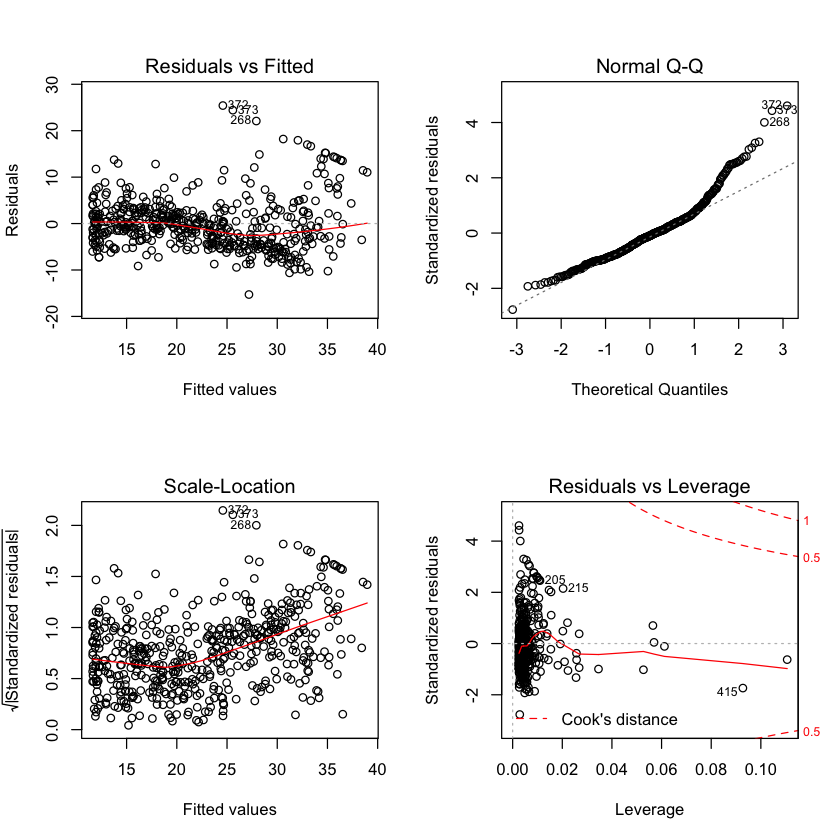

In [28]:
par(mfrow=c(2,2))
plot(lm.fit2)

In [29]:
lm.fit5 <- lm(medv~poly(lstat,5))
summary(lm.fit5)


Call:
lm(formula = medv ~ poly(lstat, 5))

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


## Exercises
1. The null hypothesis was testing whether spending on TV, radio, and newspaper advertising had a significant impact on sales. TV and radio both had low p-values, indicating that the null hypothesis was not valid and that there was a relationship between sales and TV and radio spending. Newspaper spending had a high p-value indicating that the null hypothesis holds and there is no impact of newspaper spending on sales.
2. The KNN classifier looks at the K nearest points and gives the probability that the observation lies in a particular class as the proportion of the K nearest points that belong to that class. The KNN regression takes the K nearest points and returns the average value of the response for all of these points.
3. 
    1. For a fixed value of IQ and GPA, females earn more then males. If females is true, the gender interaction term is 0 and B3 is positive.
    2. 
$$Y = 50+20(4)+.07(110)+35(1)+.01(4)(110)-10(4) = 137$$
    3. False: The size of the term does not necessarily reflect the interaction strength, the p-value is needed for this. The term is small in this case simply because X1 and X2 are not normalized (they are of different orders of magnitude).
4. 
    1. For the training set we expect the RSS for the cubic model to be lower since the model encompasses the linear model and adds extra capability. If a truly linear model had the lowest RSS then the cubic model would also be able to achieve this.
    2. The test RSS will, however, be lower for the linear as this matches the true relationship in the data. It is very likely that the cubic model will have overfit the training set.
    3. If the true relationship is nonlinear, we expect the cubic regression to outperform the linear regression as it has more capability to fit the model.
    4. Cubic regression will likely continue to outperform.
5. In notebook.
6. At $\bar{x}$ and $\bar{y}$,
$$y = \beta_1X+\beta_0 = \bar{y} - \beta_1\bar{x} + \beta_1\bar{x} = \bar{y}$$

## Work on Auto dataset:

In [30]:
lm.fit <- lm(mpg~horsepower, Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


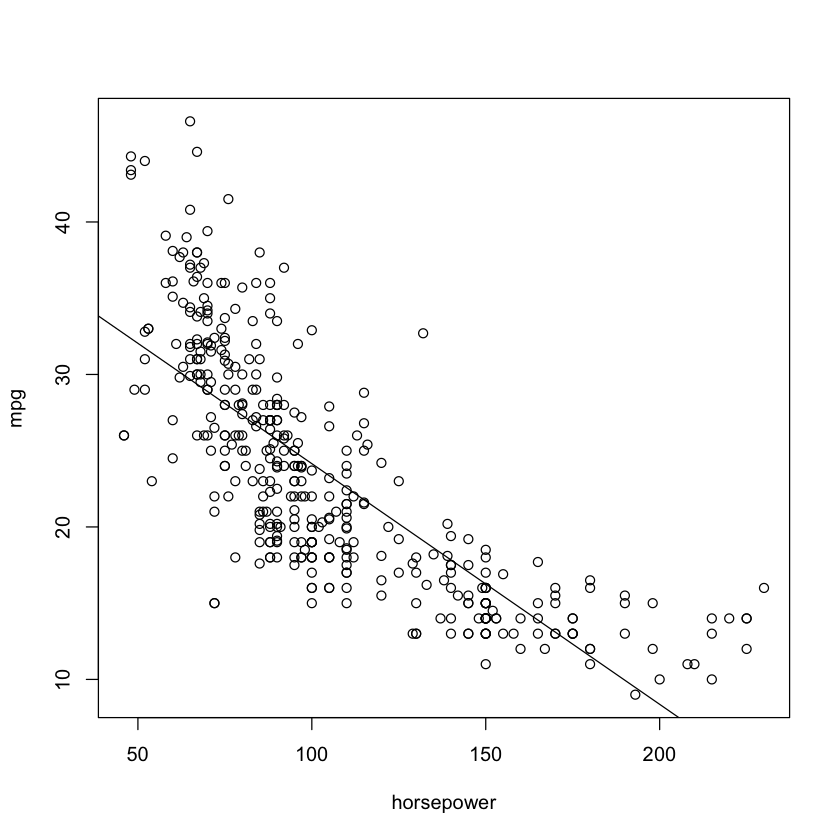

In [31]:
plot(mpg~horsepower, Auto)
abline(lm.fit)

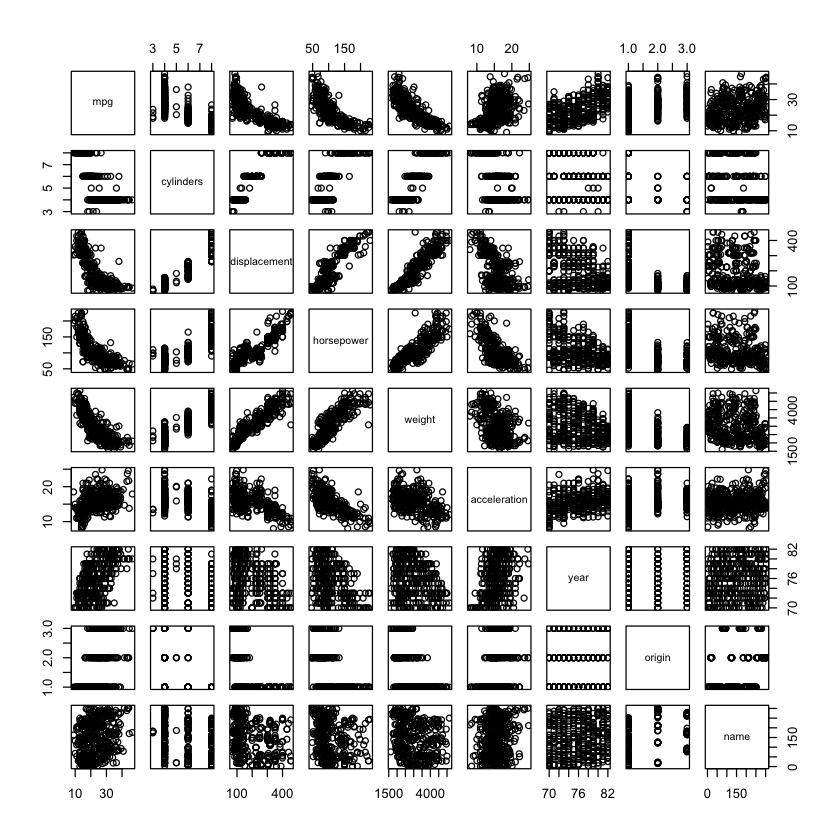

In [32]:
pairs(Auto)

In [33]:
cor(subset(Auto, select=-name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


In [34]:
lm.fit.m <- lm(mpg~.-name, data=Auto)
summary(lm.fit.m)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


## Working with Carseats dataset:

In [35]:
lm.fit <- lm(Sales~Price+Urban+US, data=Carseats)
summary(lm.fit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


In [36]:
lm.fit.small <- lm(Sales~Price+US, data=Carseats)
summary(lm.fit.small)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


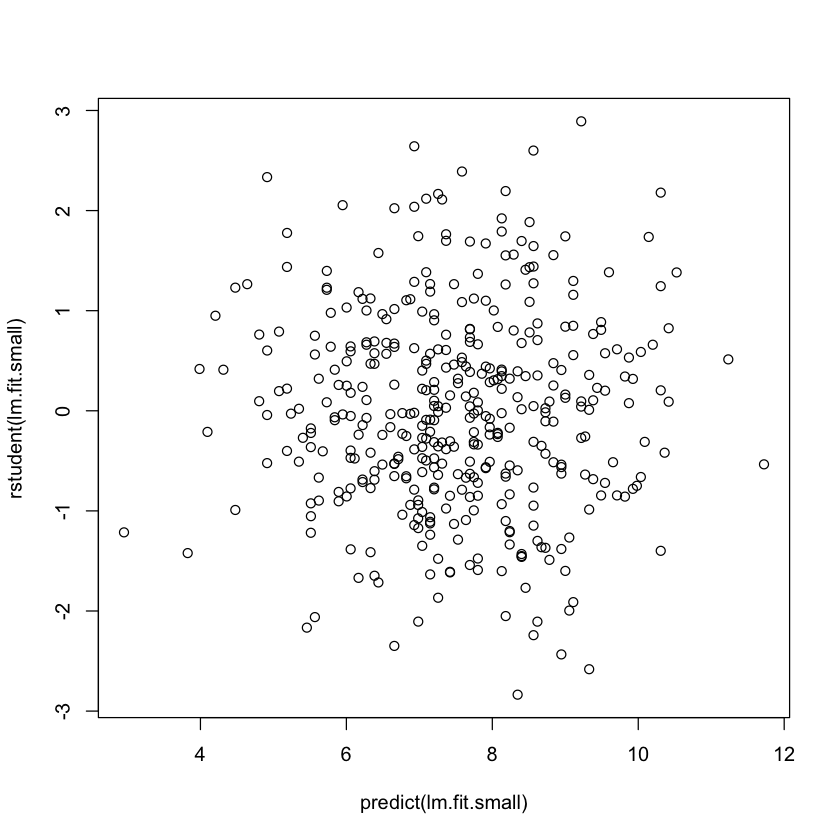

In [37]:
plot(predict(lm.fit.small), rstudent(lm.fit.small))

## 11

In [38]:
set.seed(1)
x <- rnorm(100)
y <- 2*x + rnorm(100)
lm.fit <- lm(y~x+0)
summary(lm.fit)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


In [39]:
lm.fit <- lm(x~y+0)
summary(lm.fit)


Call:
lm(formula = x ~ y + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8699 -0.2368  0.1030  0.2858  0.8938 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
y  0.39111    0.02089   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4246 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


# Chapter 4: Classification
## Lab

Look at stock market data for the S and P 500. For each date, the price of the five previous days is given.

In [40]:
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [41]:
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


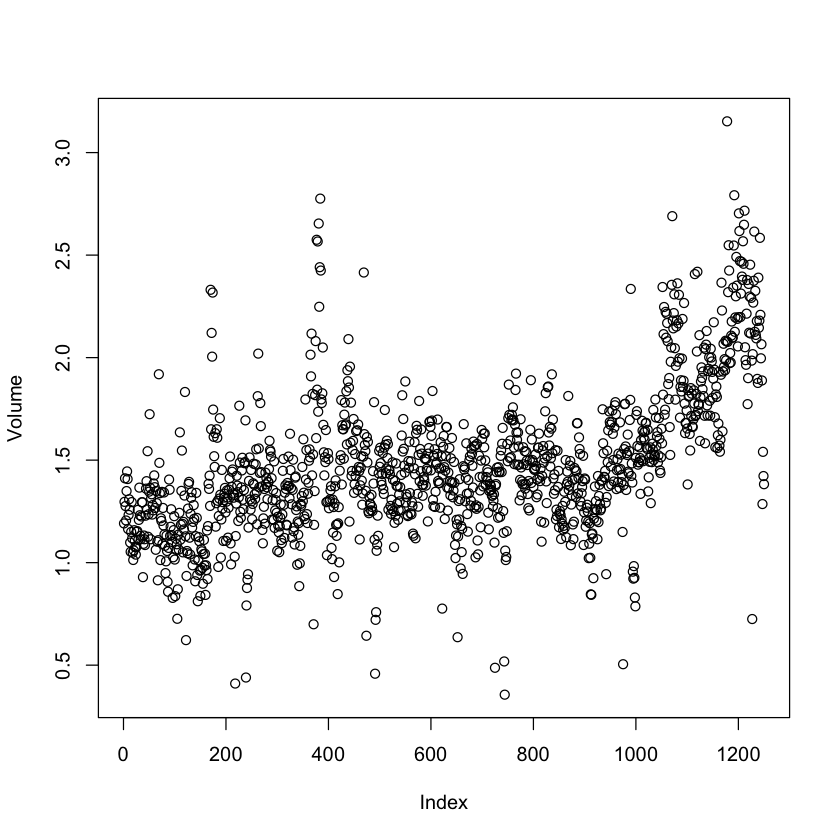

In [42]:
attach(Smarket)
plot(Volume)

Fit logistic regression model in order to predict direction.

In [43]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [44]:
glm.probs <- predict(glm.fit, type='response')
contrasts(Direction)

,Up
Down,0
Up,1


In [45]:
glm.pred <- rep("Down", 1250)
glm.pred[glm.probs > 0.5] = "Up"
table(glm.pred, Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [46]:
mean(glm.pred==Direction)

[1] 0.5216

This is the training accuracy, which is likely overoptimistic. We need to use the hold out method to calculate a more accurate measure. We will train a logistic regression using only the dates before 2005 and then test the accuracy on the dates after 2005.

In [47]:
train=(Year<2005)
Smarket.2005 <- Smarket[!train,]
Direction.2005 <- Direction[!train]

In [48]:
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Smarket, family=binomial, subset=train)
glm.probs <- predict(glm.fit, Smarket.2005, type='response')

In [49]:
glm.pred <- rep("Down", 252)
glm.pred[glm.probs>.5] <- "Up"
table(glm.pred, Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [50]:
mean(glm.pred==Direction.2005)

[1] 0.4801587

## Linear Discriminant Analysis

We will fit an LDA model on the same stock data.

In [51]:
lda.fit <- lda(Direction~Lag1+Lag2, data=Smarket, subset=train)
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

In [52]:
lda.pred <- predict(lda.fit, Smarket.2005)
lda.class <- lda.pred$class
mean(lda.class==Direction.2005)

[1] 0.5595238

## Quadratic Discriminant Analysis

In [53]:
qda.fit <- qda(Direction~Lag1+Lag2, data=Smarket, subset=train)
qda.fit

Call:
qda(Direction ~ Lag1 + Lag2, data = Smarket, subset = train)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

In [54]:
qda.pred <- predict(qda.fit, Smarket.2005)
qda.class <- qda.pred$class
mean(qda.class==Direction.2005)

[1] 0.5992063

## K-Nearest Neighbors

In [55]:
library(class)
train.X <- cbind(Lag1, Lag2)[train,]
test.X <- cbind(Lag1, Lag2)[!train,]
train.Direction <- Direction[train]

In [56]:
set.seed(1)
knn.pred <- knn(train.X, test.X, train.Direction, k=3)
table(knn.pred, Direction.2005)

        Direction.2005
knn.pred Down Up
    Down   48 55
    Up     63 86

In [57]:
mean(knn.pred==Direction.2005)

[1] 0.531746

## Exercises
1. See notebook
2. See notebook. Take log of right side of 4.12. Denominator is constant for all classes, only need to focus on numerator. After taking log of numerator, expand term with (x-u)^2 and ignore term with only x^2 as it is constant for all classes. Leaves equation 4.13.
3. Same procedure as previous except term with x^2 can no longer be ignored in optimization as it's coefficient contaings a $\sigma_k$ which is not constant between classes.
4. 
    1. If p=1, and we want to user a range of data within 10% of X, we will use 10% of the dataset for this prediction.
    2. If p=2, then we use 1%.
    3. If p=100, then we use 1E-100% of the dataset
    4. We see from the previous, that when p gets large, the dataset becomes very sparse. In other words, there become very few points that are close to X to use for prediction.
5.  
    1. If decision boundary is linear we expect QDA to perform bettern then LDA on the training set because of it's increased capability. On the test set, we expect LDA to outperform QDA as QDA will be prone to overfitting.
    2. If decision boundary is nonlinear, we expect QDA to perform bettern in test and training sets.
    3. As sample size increases, we expect QDA's performance relative to LDA to increase as it's extra variance is offset by the larger sample size.
    4. False: If decision boundary is linear, QDA will be prone to overfitting the training set.
8. Since knn has by definition a 0% training error rate, this means it had a 36% error rate on test set. Logistic regression error rate is lower (30%) so I would chose it.
9.  
    1. 27%
    2. 0.19

# Chapter 5: Resampling Methods
## Lab

Validation Set approach

In [58]:
set.seed(1)
train <- sample(392, 196)
lm.fit <- lm(mpg~horsepower, data=Auto, subset=train)

In [59]:
attach(Auto)
mean((mpg-predict(lm.fit, Auto))[-train]^2)

[1] 26.14142

This is the MSE for linear regression, we can now try some polynomial regressions.

In [60]:
lm.fit2 <- lm(mpg~poly(horsepower,2), data=Auto, subset=train)
mean((mpg-predict(lm.fit2, Auto))[-train]^2)

[1] 19.82259

In [61]:
lm.fit3 <- lm(mpg~poly(horsepower,3), data=Auto, subset=train)
mean((mpg-predict(lm.fit3, Auto))[-train]^2)

[1] 19.78252

Leave-One-Out Cross-Validation

In [62]:
library(boot)
glm.fit <- glm(mpg~horsepower, data=Auto)
cv.err <- cv.glm(Auto, glm.fit)
cv.err$delta

[1] 24.23151 24.23114

We can fit polynomials up to order 5

In [63]:
cv.error <- rep(0,5)
for (i in 1:5){
    glm.fit <- glm(mpg~poly(horsepower, i), data=Auto)
    cv.error[i] <- cv.glm(Auto, glm.fit)$delta[1]
}
cv.error

[1] 24.23151 19.24821 19.33498 19.42443 19.03321

k-Fold Cross-Validation

In [64]:
set.seed(17)
cv.error.10 <- rep(0,10)
for (i in 1:10){
    glm.fit <- glm(mpg~poly(horsepower, i), data=Auto)
    cv.error.10[i] <- cv.glm(Auto, glm.fit, K=10)$delta[1]
}
cv.error.10

[1] 24.20520 19.18924 19.30662 19.33799 18.87911 19.02103 18.89609 19.71201
 [9] 18.95140 19.50196

Bootstrap

In [65]:
alpha.fn <- function(data, index){
    X <- data$X[index]
    Y <- data$Y[index]
    return((var(Y)-cov(X,Y))/(var(X)+var(Y)-2*cov(X,Y)))
}

This function estimates alpha using the observations specified in index.

In [66]:
set.seed(1)
alpha.fn(Portfolio, sample(100, 100, replace=T))

[1] 0.5963833

This shows a single test in a bootstrap analysis, we can automate this using the boot function.

In [67]:
boot(Portfolio, alpha.fn, R=1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Portfolio, statistic = alpha.fn, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.5758321 -7.315422e-05  0.08861826

We can use this same approach to estimate the variance in the linear regression model.

In [68]:
boot.fn <- function(data,index)
    return(coef(lm(mpg~horsepower, data=data, subset=index)))
boot.fn(Auto, 1:392)

(Intercept)  horsepower 
 39.9358610  -0.1578447

In [69]:
boot(Auto, boot.fn, 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Auto, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
      original        bias    std. error
t1* 39.9358610  0.0126152644 0.871267432
t2* -0.1578447 -0.0002691801 0.007540188

In [70]:
summary(lm(mpg~horsepower, data=Auto))


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


## Exercises
1. See notebook
2. 
    1. Probability that first observation is not j is (1-1/n)
    2. Probability for second observation not being j is the same
    3. Drawing n samples, then gives a probability that the jth observation is not inthe bootstrap set of (1-1/n)^n
3. k-fold cross-validation randomly partitions the dataset in to k evenly sized samples. For k iterations, it fits the model using all but one partition. It then uses the unused partition to estimate the accuracy of the model. It is computationally less demanding then LOOCV and has less variance since it is training models on sufficiently different subsets.
4. We could use a bootstrap analysis to estimate the error of this prediction. This could be done by sampling, with repeat, n samples from the data set and calculating the response. Repeating this procedure will then give us an estimate for the variance of the response.

# Chapter 6: Linear Model Selection and Regularization

## Lab
Best Subset Selection

In [73]:
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

Goal is to predict a players salary. Some player's have missing salary values replaced by nans

In [74]:
sum(is.na(Hitters$Salary))

[1] 59

We now remove the rows with missing salaries

In [75]:
Hitters <- na.omit(Hitters)

In [79]:
library(leaps)
regfit.full <- regsubsets(Salary~., Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

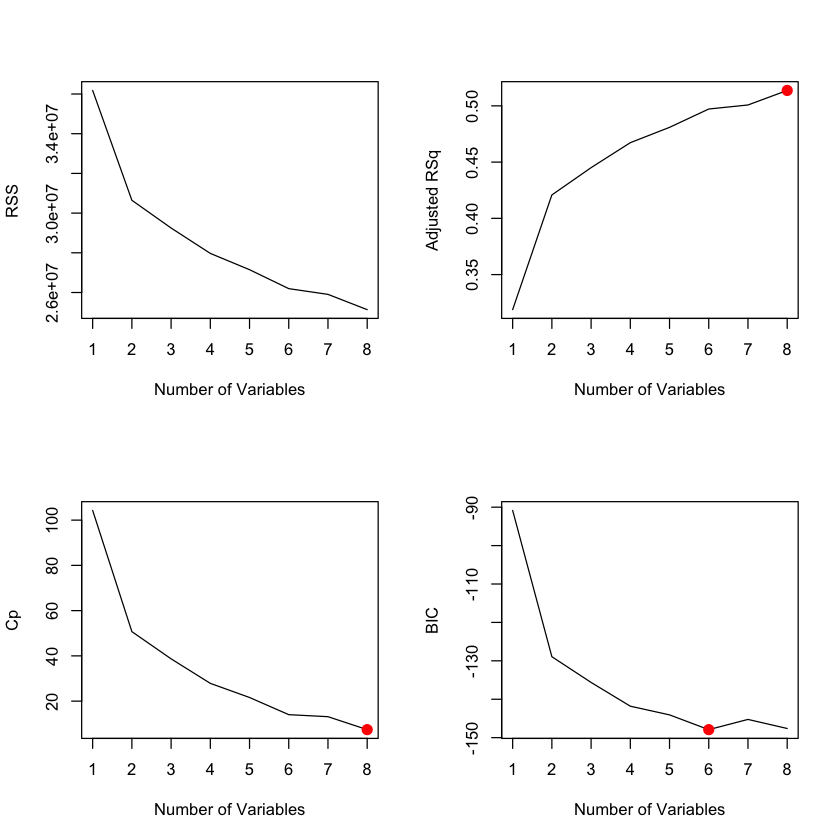

In [84]:
reg.summary <- summary(regfit.full)
par(mfrow=c(2,2))
plot(reg.summary$rss, xlab='Number of Variables', ylab='RSS', type='l')
plot(reg.summary$adjr2, xlab='Number of Variables', ylab='Adjusted RSq', type='l')
maxr2 <- which.max(reg.summary$adjr2)
points(maxr2, reg.summary$adjr2[maxr2], col='red', cex=2, pch=20)
plot(reg.summary$cp, xlab='Number of Variables', ylab='Cp', type='l')
mincp <- which.min(reg.summary$cp)
points(mincp, reg.summary$cp[mincp], col='red', cex=2, pch=20)
minbic <- which.min(reg.summary$bic)
plot(reg.summary$bic, xlab='Number of Variables', ylab='BIC', type='l')
points(minbic, reg.summary$bic[minbic], col='red', cex=2, pch=20)

Ridge Regression and the Lasso

## Exercises
1. 
    a. Best subset includes the models for both forward and backward selection so it will always have the best (or equal) training RSS.
    b. Same
    c. True, True, False, False, False